<h1>Fraudulent Credit Card Transactions</h1>

In the following code we want to create and train a machine learning model to detect fraudulent credit card transactions based on a training data set

<h2> STEP 1 | IMPORT DATA & LIBRARIES<h2>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, neighbors
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier

<h2> STEP 2 | LOAD DATA<h2>

In [33]:
data = pd.read_csv("card_transdata.csv")

<h2 color = green> STEP 3 | DATA OVERVIEW<h2>

In [34]:
print(data.shape)
data.head()

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [35]:
data.duplicated().any()

False

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


<h3>Analysis</h3>

Our training dataset consists of:

- 100.000 entries
- 8 features representing transaction attributes:
    * distance_from_home: the distance from home where the transaction happened
    * distance_from_last transaction: the distance from last transaction on card
    * ratio_to_median_purchase_price: ratio of purchased price transaction to median purchase price
    * repeat_retailer: has the transaction happened from same retailer
    * used_chip: was the transaction through chip
    * used_pin_number: was a pin number used to complete the transaction
    * online_order: was the transaction an online order
- "fraud" being our Output value (1 = fraudulent || 0 = not fraudulent)



<h2> STEP 4 | EDA ANALYSIS<h2>

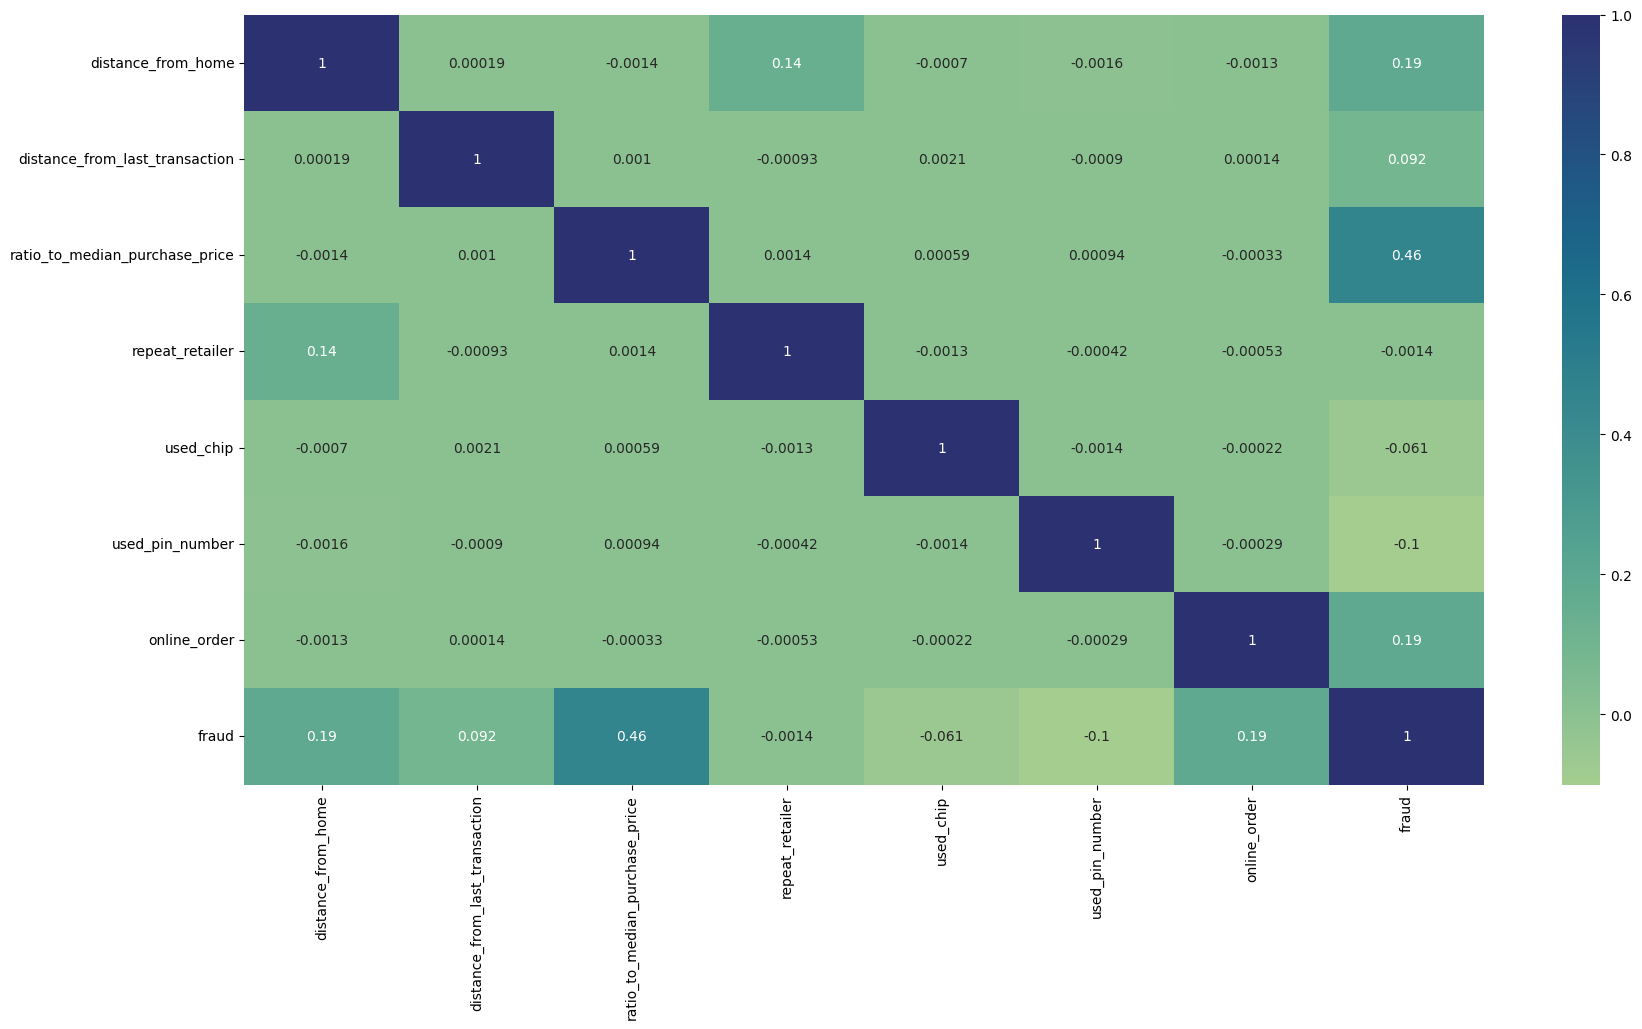

In [37]:
heatmap = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap="crest", annot=True)
plt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_13220\2559559275.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_correlation_sorted.values, y=class_correlation_sorted.index,


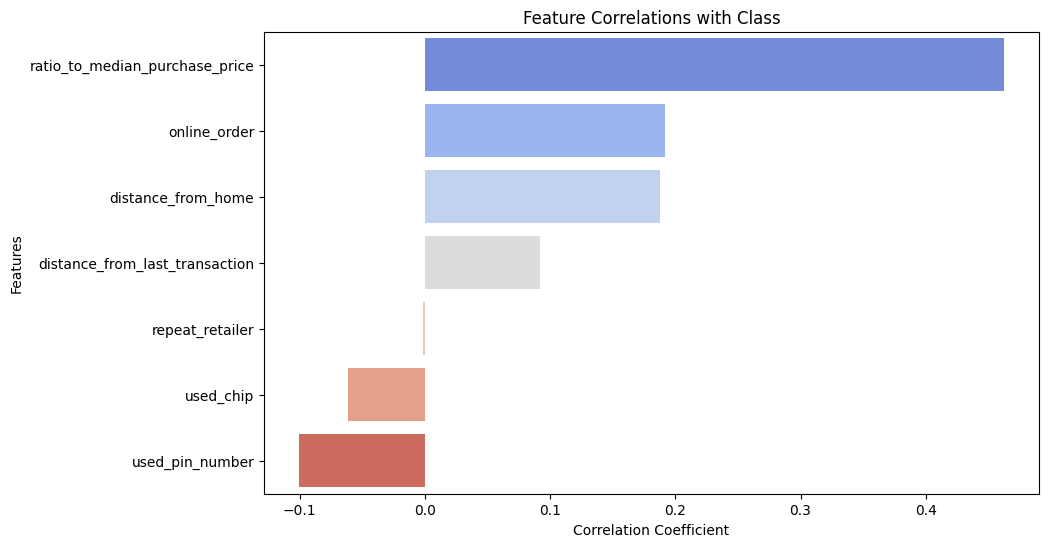

In [38]:
correlation_matrix = data.corr()

# Extracting the correlations with the 'Class' column
class_correlation = correlation_matrix['fraud']

# Dropping the 'Class' correlation with itself and sorting the values
class_correlation_sorted = class_correlation.drop('fraud').sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_correlation_sorted.values, y=class_correlation_sorted.index,
            palette='coolwarm')

# Adding title and labels for clarity
plt.title('Feature Correlations with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Removing the legend as it's unnecessary for this plot
plt.legend([], [], frameon=False)

# Display the plot
plt.show()



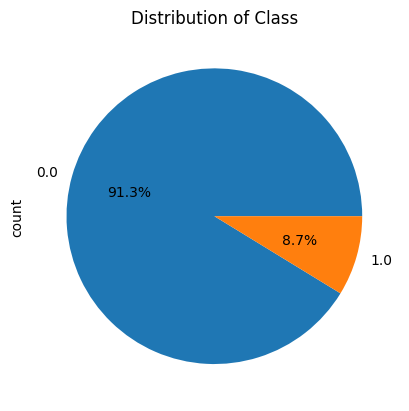

In [39]:
data["fraud"].value_counts().plot.pie(autopct = "%3.1f%%")
plt.title("Distribution of Class")
plt.show()

Since our dataset is inbalenced (roughly 91.3% non-fraudulent and 8.7% fraudulent) we want to perform resampling

In [40]:
real = data[data["fraud"] == 0]
fraud = data[data["fraud"] == 1]

# Resampling the original dataset with 87,403 datapoints for both classes
real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

# Creating new dataset consisting of equal class occurence 
data_corrected = pd.concat([real_resample, fraud_resample], axis = 0)

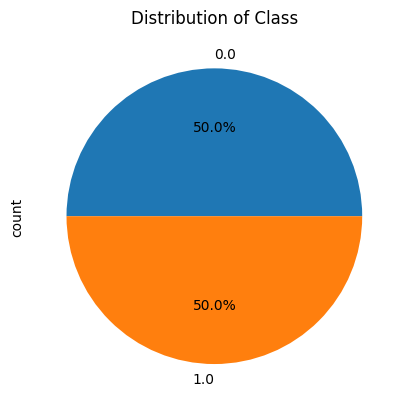

In [41]:
data_corrected["fraud"].value_counts().plot.pie(autopct = "%3.1f%%")
plt.title("Distribution of Class")
plt.show()

Now our dataset is evenly distributed after resampling

<h3>Data Preparation</h3>

Next up we want to prepare our data to be used in the machine learning process

Firstly, deviding our features into dependent and independent
- In our dataset the feature "fraud" is what we want to predict (fraudelent/non-fraudulent) -> dependent feature
- All other features are independent 

In [42]:
x = np.array(data_corrected.drop(columns = "fraud"))
y = np.array(data_corrected["fraud"])

In [43]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (174806, 7)
Shape of y (174806,)


<h3>Modeling</h3>

Now we want to divide the dataset into a training and a testing dataset
- Training: Train our machine learning model
- Testing: Test our machine learning model

In [44]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 123, shuffle = True)

In [45]:
# Data scaling to produce good results
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(139844, 7)
(34962, 7)
(139844,)
(34962,)


<h3>Logistic Regression:</h3>

For our credit card fraud detection we want to test logic regression first:
- supervised machine learning algorithm
- used for binary classification tasks (here: fraudulent/non-fraudulent)
- analyzes the relationship between one or more independent variables
- good for predicitive modeling

In [47]:
lr=LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [49]:
cm = confusion_matrix(y_test, preds_lr_test)
cm

array([[15831,  1671],
       [ 1227, 16233]], dtype=int64)

Text(120.72222222222221, 0.5, 'Truth')

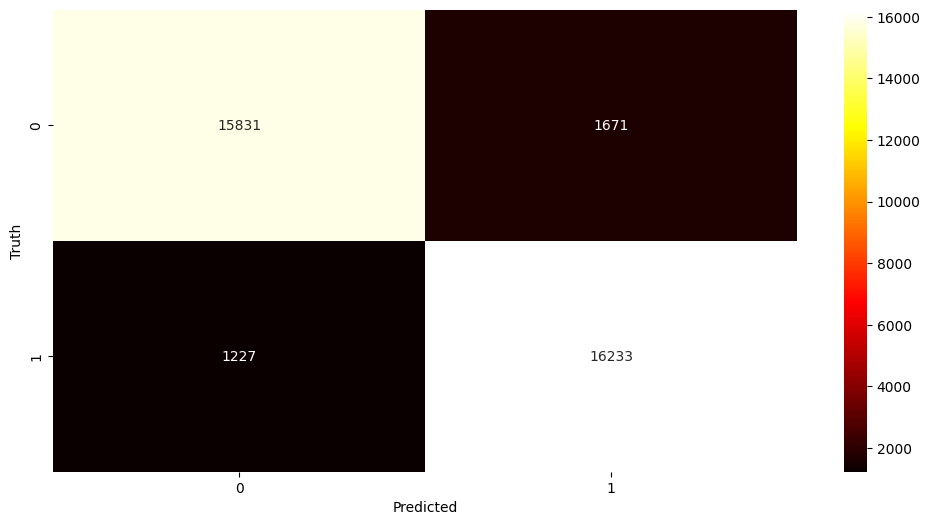

In [50]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot", fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
accuracy = lr.score(x_train, y_train)
validation_accuracy = lr.score(x_test, y_test)
print("LR Accuracy:",accuracy)
print("LR Validation Accuracy:",validation_accuracy)
print(classification_report(y_test, preds_lr_test))

LR Accuracy: 0.9194531048883041
LR Validation Accuracy: 0.9171100051484469
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     17502
         1.0       0.91      0.93      0.92     17460

    accuracy                           0.92     34962
   macro avg       0.92      0.92      0.92     34962
weighted avg       0.92      0.92      0.92     34962



Theres still some things to improve, so lets try K means Clustering next:

<h3>K-Means Clustering</h3>

- unsupervised machine learning algorithm
- used for clustering (here: putting same transaction types in same clusters)
- analyzes relation between different features to group similar datapoints
- good for explorative data analysis and pattern recognition


In [52]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17417,    85],
       [   13, 17447]], dtype=int64)

In [54]:
precision_score(y_test, y_pred)

0.9951517225644536

Text(120.72222222222221, 0.5, 'Truth')

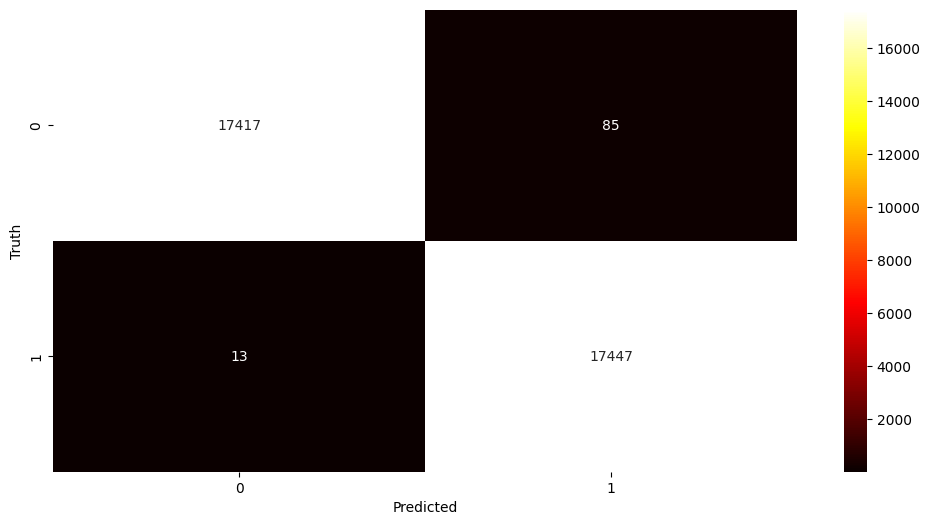

In [55]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot", fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [56]:
accuracy = knn.score(x_train, y_train)
validation_accuracy = knn.score(x_test, y_test)
print("KNN Accuracy:",accuracy)
print("KNN Validation Accuracy:",validation_accuracy)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.998498326706902
KNN Validation Accuracy: 0.9971969566958412
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



These results look really good, lets try a random forest lastly and see how it performs:

<h3>Random Forest</h3>

- supervised machine learning algorithm
- used for classification and regression (here: predicting a target variable based on input features)
- constructs multiple decision trees and aggregates their results
- good for handling overfitting and improving prediction accuracy

In [57]:
rf = RandomForestClassifier(random_state = 123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17499,     3],
       [    0, 17460]], dtype=int64)

In [59]:
precision_score(y_test, y_pred)

0.9998282082116475

Text(120.72222222222221, 0.5, 'Truth')

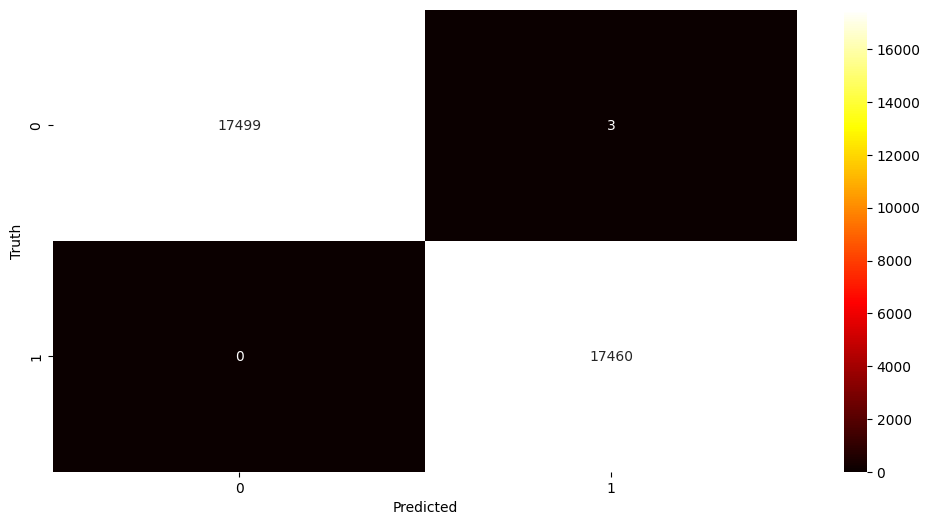

In [60]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot", fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [61]:
accuracy = rf.score(x_train, y_train)
validation_accuracy = rf.score(x_test, y_test)
print("RF Accuracy:",accuracy)
print("RF Validation Accuracy:",validation_accuracy)
print(classification_report(y_test, y_pred))

RF Accuracy: 1.0
RF Validation Accuracy: 0.9999141925519135
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



We have achieved really good results with the 3 models we used, while the Random Forest Classifier gave us the best results with a little worse performance than the K Means Clustering. Since the performance aspect is not too bad, were gonna use the Random Forest Classifier for our predicition on streamlit.